In [1]:
import pandas as pd
import numpy as np
import csv
import pickle

In [6]:
filepath_users = 'data/turpravda/userswTypes'; 
filepath_rev = 'data/turpravda/tripswTypes'; 
filepath_hotels = 'data/turpravda/hotels39K'
filepath_countries = 'data/turpravda/countries'
filepath_resorts = 'data/turpravda/resorts'

countries = pd.read_csv('data/turpravda/iso-flags.csv')
hotels = pd.read_pickle(filepath_hotels)
resorts = pd.read_pickle(filepath_resorts)
reviews = pd.read_pickle(filepath_rev)
with open(filepath_users, 'rb') as f:
    users = pickle.load(f)
id_for_users = [i for i in range(len(users))]
users['user_id'] = id_for_users

In [16]:
reviews.head(1)
for_dates = ['hotel_id','posted_at']
for_hotels = ['resort_id','id']
d = reviews[for_dates]
h = hotels[for_hotels]
hotel_date = pd.merge(d,h, left_on = 'hotel_id', right_on = 'id')
hotel_date.head(1)

,hotel_id,posted_at,resort_id,id
0,10000,2008-04-26,cz/karlovy_vary,10000.0


In [23]:
countries['code'] = countries['code'].apply(lambda x: str(x).lower())

In [18]:
hotel_date = pd.merge(hotel_date, resorts, left_on = 'resort_id', right_on = 'id')

In [25]:
hotel_date_country = pd.merge(hotel_date, countries, left_on='country_id', right_on = 'code')

In [31]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype))

def agg_count(df, group_field):
    grouped = df.groupby(group_field, as_index=False).size()
    grouped.sort_values(ascending = False)

    grouped = pd.DataFrame(grouped).reset_index()
    grouped.columns = [group_field, 'Count']
    return grouped

In [33]:
seasons.head(1)

,country,date
0,Чехия,2008-04-26


In [27]:
for_season = ['name', 'posted_at']
seasons = hotel_date_country[for_season]
seasons.columns = ['country', 'date']

In [30]:
unique_col_values(seasons)

country | 104 | object
date | 4615 | datetime64[ns]


In [34]:
winter = ['01','02','12']
spring = ['03','04','05']
summer = ['06','07','08']
automn = ['09','10','11']

In [50]:
seasons['date'] = seasons['date'].apply(lambda x: str(x)[0:10])

C:\Users\lyuba\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
winter_countries = pd.concat([seasons.loc[seasons['date'].str.contains('-01-')],
                            seasons.loc[seasons['date'].str.contains('-02-')],
                            seasons.loc[seasons['date'].str.contains('-12-')]])

In [79]:
spring_countries = pd.concat([seasons.loc[seasons['date'].str.contains('-03-')],
                            seasons.loc[seasons['date'].str.contains('-04-')],
                            seasons.loc[seasons['date'].str.contains('-05-')]])
summer_countries = pd.concat([seasons.loc[seasons['date'].str.contains('-06-')],
                            seasons.loc[seasons['date'].str.contains('-07-')],
                            seasons.loc[seasons['date'].str.contains('-08-')]])
autumn_countries = pd.concat([seasons.loc[seasons['date'].str.contains('-09-')],
                            seasons.loc[seasons['date'].str.contains('-10-')],
                            seasons.loc[seasons['date'].str.contains('-11-')]])

In [74]:
pop_winter_countries = agg_count(winter_countries,'country').sort_values('Count', ascending=False)

In [80]:
pop_spring_countries = agg_count(spring_countries,'country').sort_values('Count', ascending=False)
pop_summer_countries = agg_count(summer_countries,'country').sort_values('Count', ascending=False)
pop_autumn_countries = agg_count(autumn_countries,'country').sort_values('Count', ascending=False)

In [78]:
pop_winter_countries.to_csv(r'data/seasonality/winter.csv',index=False)

In [81]:
pop_spring_countries.to_csv(r'data/seasonality/spring.csv',index=False)
pop_summer_countries.to_csv(r'data/seasonality/summer.csv',index=False)
pop_autumn_countries.to_csv(r'data/seasonality/autumn.csv',index=False)

In [85]:
pop_spring_countries.head(25)

,country,Count
19,Египет,7275
68,Турция,5888
66,Таиланд,1186
69,Украина,1152
15,Греция,894
57,Россия,782
51,ОАЭ,734
32,Кипр,401
76,Чехия,353
79,Шри-Ланка,322


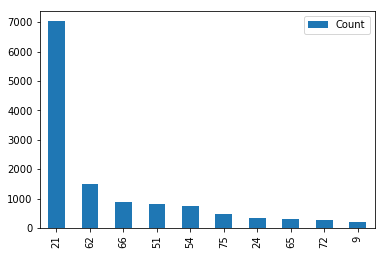

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
pop_winter_countries[:10].plot(kind = 'bar')